# First Look to Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)

In [2]:
df_ = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df = df_.copy()

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [7]:
type(df["TotalCharges"][0])

numpy.float64

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


# Numerical and Categorical Variables Analysis

In this section, numeric and categorical variables will be determined. The grab_col_names() function will be used for this. First of all, data classes are mentioned below.
* **Numerical**
* **Categorical**
* **Numerical Looking but Categorical Variable**  
For example, let's say we have the values ​​of the Class variable as 1, 2, 3. These values ​​are numeric but represent categories.
* **Categorical Looking but Carry No Information**  
The customerID variable is an example of this. Its type is object, but it does not carry information in terms of category. Contains many classes.  

grab_col_names() function gives the names of Categorical, Numerical and Categorical Looking but Carry No Information variables in the data set.   
  
**cat_cols :** Categorical Columns  
**num_cols :** Numerical Columns  
**cat_but_car :** Columns of Categorical Looking but Carry No Information  
**cat_th :** Class Threshold for Numerical Looking but Categorical Variables  
**car_th :** Class Threshold for Categorical Looking but Carry No Information Variables   
  
**Note :** Numerical Looking but Categorical Variable are also included in categorical variables. 


In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
 
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [11]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [12]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [13]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [14]:
cat_but_car

['customerID']

In this section, numerical and categorical variables will be analyzed using cat_summary() and num_summary() functions.  

The value numbers of the classes in the variable are given by the cat_summary function and the ratio information is given. It is then visualized. 

In [15]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("####################################################################")
    if plot:
        sns.countplot(y=dataframe[col_name], data=dataframe)
        plt.show()

        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435
####################################################################


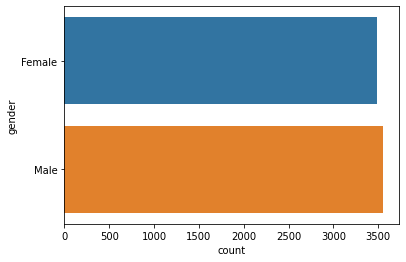

     Partner     Ratio
No      3641  51.69672
Yes     3402  48.30328
####################################################################


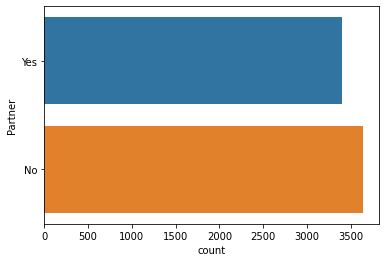

     Dependents      Ratio
No         4933  70.041176
Yes        2110  29.958824
####################################################################


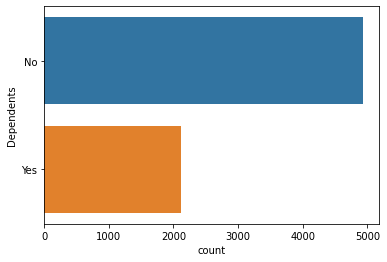

     PhoneService      Ratio
Yes          6361  90.316626
No            682   9.683374
####################################################################


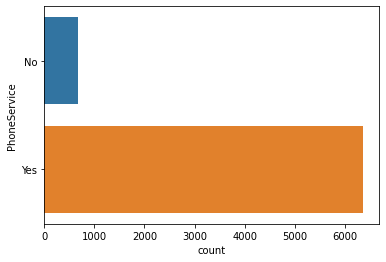

                  MultipleLines      Ratio
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
####################################################################


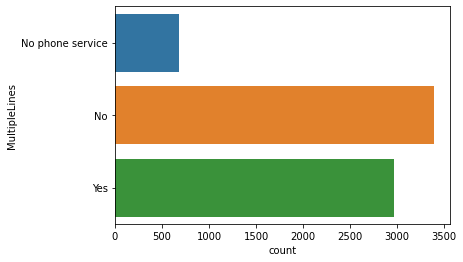

             InternetService      Ratio
Fiber optic             3096  43.958540
DSL                     2421  34.374556
No                      1526  21.666903
####################################################################


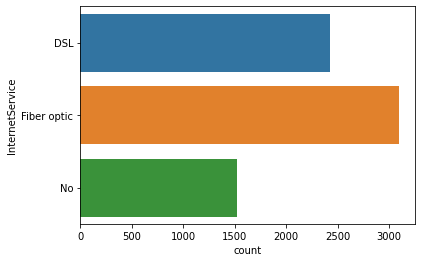

                     OnlineSecurity      Ratio
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903
####################################################################


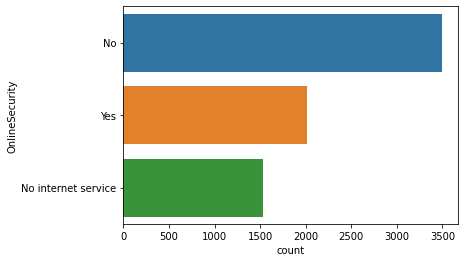

                     OnlineBackup      Ratio
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903
####################################################################


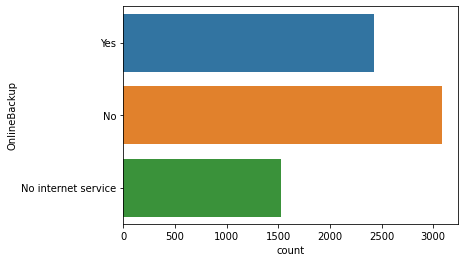

                     DeviceProtection      Ratio
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903
####################################################################


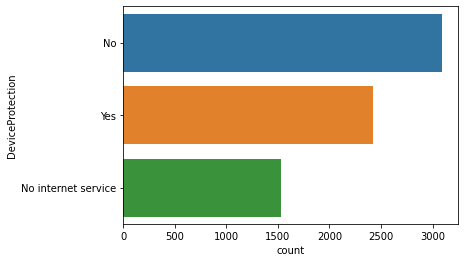

                     TechSupport      Ratio
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903
####################################################################


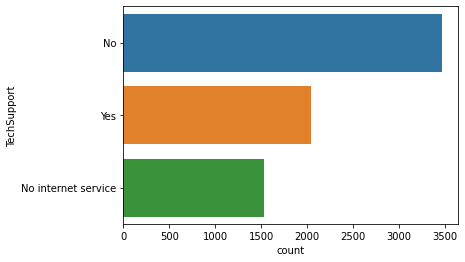

                     StreamingTV      Ratio
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903
####################################################################


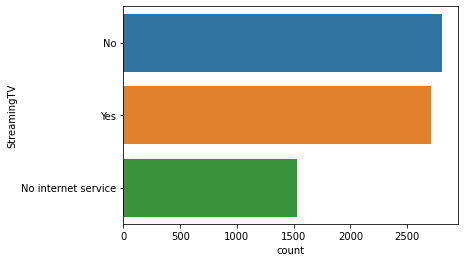

                     StreamingMovies      Ratio
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903
####################################################################


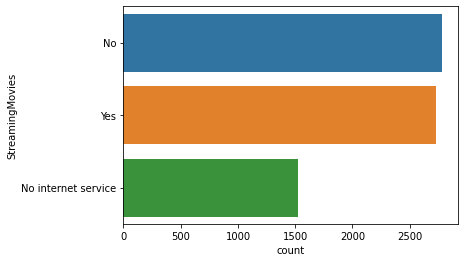

                Contract      Ratio
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383
####################################################################


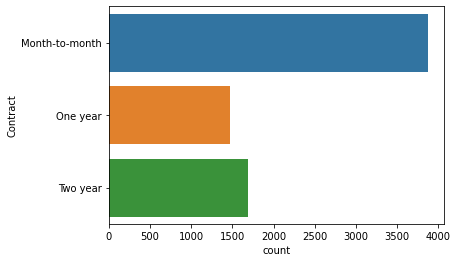

     PaperlessBilling      Ratio
Yes              4171  59.221922
No               2872  40.778078
####################################################################


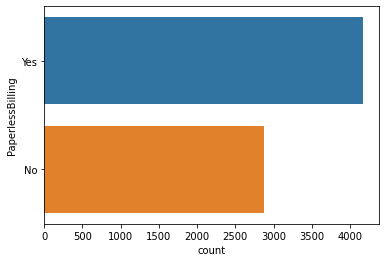

                           PaymentMethod      Ratio
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109
####################################################################


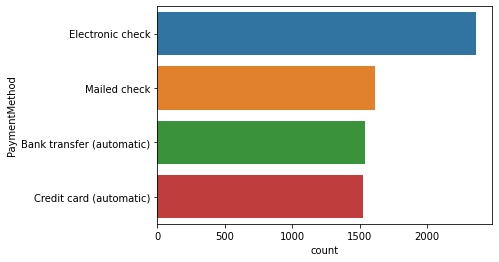

     Churn      Ratio
No    5174  73.463013
Yes   1869  26.536987
####################################################################


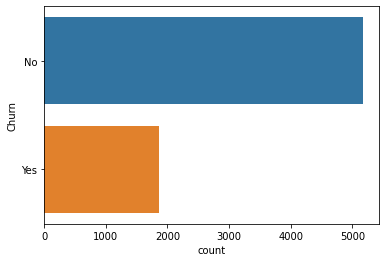

   SeniorCitizen      Ratio
0           5901  83.785319
1           1142  16.214681
####################################################################


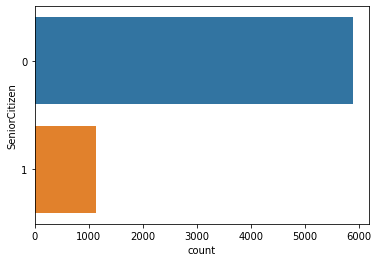

In [16]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

With the num_summary function, descriptive statistics of the numerical columns are given and then visualized using the histogram.

In [17]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=30)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


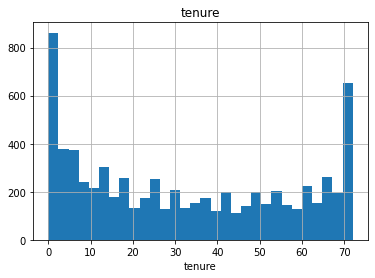

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


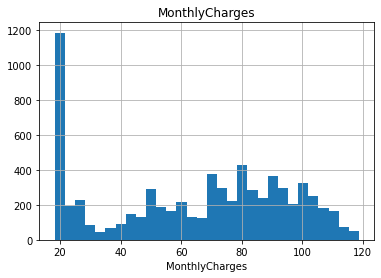

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64


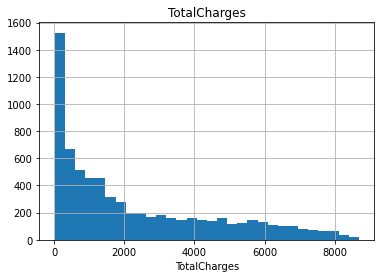

In [18]:
for col in num_cols:
    num_summary(df, col, plot=True)

# Target Variable Analysis

In this section, target variable analysis will be done. The average of the target variable will be given according to the classes of the categorical variables. Here our target variable is "Churn".

In [19]:
df["Churn"] = df["Churn"].apply(lambda x : 1 if (x == "Yes") else 0)

In [20]:
def target_summary_cat(df, target, cat_col):
    print("target : ", target)
    print(cat_col)
    print(pd.DataFrame({"TARGET_MEAN": df.groupby(cat_col)[target].mean(),
                        "Count": df[cat_col].value_counts(),
                        "Ratio": 100 * df[cat_col].value_counts() / len(df)}), end="\n\n\n")

In [21]:
for col in cat_cols:
    target_summary_cat(df, "Churn", col)

target :  Churn
gender
        TARGET_MEAN  Count     Ratio
Female     0.269209   3488  49.52435
Male       0.261603   3555  50.47565


target :  Churn
Partner
     TARGET_MEAN  Count     Ratio
No      0.329580   3641  51.69672
Yes     0.196649   3402  48.30328


target :  Churn
Dependents
     TARGET_MEAN  Count      Ratio
No      0.312791   4933  70.041176
Yes     0.154502   2110  29.958824


target :  Churn
PhoneService
     TARGET_MEAN  Count      Ratio
No      0.249267    682   9.683374
Yes     0.267096   6361  90.316626


target :  Churn
MultipleLines
                  TARGET_MEAN  Count      Ratio
No                   0.250442   3390  48.132898
No phone service     0.249267    682   9.683374
Yes                  0.286099   2971  42.183729


target :  Churn
InternetService
             TARGET_MEAN  Count      Ratio
DSL             0.189591   2421  34.374556
Fiber optic     0.418928   3096  43.958540
No              0.074050   1526  21.666903


target :  Churn
OnlineSecurity
     

The average of the numerical variables according to the target variable is given.

In [22]:
def target_summary_num(df, target, numerical_col):
    print("Numerical Column :", numerical_col)
    print(df.groupby(target)[numerical_col].mean(), end="\n\n\n")

In [23]:
for col in num_cols:
    target_summary_num(df, "Churn", col)

Numerical Column : tenure
Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64


Numerical Column : MonthlyCharges
Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64


Numerical Column : TotalCharges
Churn
0    2555.344141
1    1531.796094
Name: TotalCharges, dtype: float64




# Outlier Analysis

In this section, outlier analysis will be done. The upper and lower limits will be determined with the outlier_thresholds() function. Then it will be observed whether there is an outlier using the check_outlier() function.

In [24]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [25]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [26]:
for col in num_cols:
    print(col,"-", check_outlier(df, col))

tenure - False
MonthlyCharges - False
TotalCharges - False


# Missing Value Analysis

In this section, missing value analysis will be done. With the help of missing_values_table() function, a dataframe containing information about missing values ​​will be created. This dataframe contains information about how many missing values ​​are in each column and their ratio.

In [27]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [28]:
missing_values_table(df, True)

              n_miss  ratio
TotalCharges      11   0.16


['TotalCharges']

It was determined that the missing values ​​in the TotalChanges variable were caused by the tenure variable. It has been observed that the total amount collected from the customer comes as NaN when the number of months the customer has stayed in the company is zero. Afterwards, the monthly amounts collected from the customer were examined and it was seen that they were full. In order to solve the problem, NaN values ​​are filled with monthly values.

In [29]:
df.loc[df.isnull().any(axis=1),"TotalCharges"]

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [30]:
na_index = df.loc[df.isnull().any(axis=1),"TotalCharges"].index

na_index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [31]:
df.loc[na_index]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [32]:
df.loc[df["tenure"] == 0,"tenure"]

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

In [33]:
df.loc[na_index,["tenure","TotalCharges"]]

,tenure,TotalCharges
488,0,NaN
753,0,NaN
936,0,NaN
1082,0,NaN
1340,0,NaN
3331,0,NaN
3826,0,NaN
4380,0,NaN
5218,0,NaN
6670,0,NaN


In [34]:
df.loc[na_index,"MonthlyCharges"]

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

In [35]:
df.loc[na_index,"TotalCharges"] = df.loc[na_index,"MonthlyCharges"]

In [36]:
df.loc[na_index,["tenure","TotalCharges","MonthlyCharges"]]

,tenure,TotalCharges,MonthlyCharges
488,0,52.55,52.55
753,0,20.25,20.25
936,0,80.85,80.85
1082,0,25.75,25.75
1340,0,56.05,56.05
3331,0,19.85,19.85
3826,0,25.35,25.35
4380,0,20.00,20.00
5218,0,19.70,19.70
6670,0,73.35,73.35


In [37]:
missing_values_table(df, True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

# Correlation Analysis

Correlation analysis was performed. Correlation Heatmap and Triangle Correlation Heatmap were given.

In [38]:
corr = df[num_cols].corr()

In [39]:
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826164
MonthlyCharges,0.247900,1.000000,0.651182
TotalCharges,0.826164,0.651182,1.000000


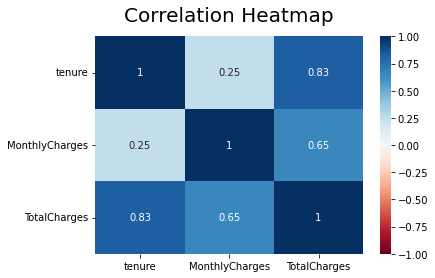

In [40]:
heatmap = sns.heatmap(corr, cmap="RdBu", vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=15);

In [41]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
mask

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([[ True,  True,  True],
       [False,  True,  True],
       [False, False,  True]])

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

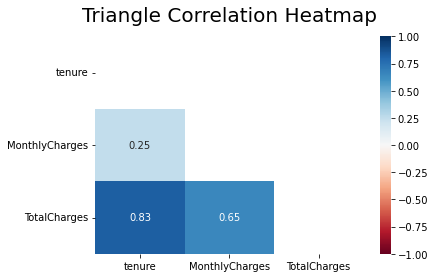

In [42]:
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="RdBu")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':20}, pad=15)

# Feature Extraction

New features will be created.

**1 -** Customers for more than 1 year

In [43]:
df["onePlusYearCustomer"] = df["tenure"].apply(lambda x : 1 if x > 12 else 0)

**2 -** Customers who have a month-to-month contract and have completed 1 year.

In [44]:
df["onePlusYearCustomer_MonthlyContract"] = df.apply(lambda x : 1 if(x["onePlusYearCustomer"] == 1) & (x["Contract"] == "Month-to-month") else 0, axis = 1)

**3 -** Whether the customer has internet service

In [45]:
df["noInternetService"] = df["InternetService"].apply(lambda x : 1 if x == "No" else 0)

**4 -** Customers making automatic payments

In [46]:
df["automaticPayment"] = df["PaymentMethod"].apply(lambda x : 1 if(x == "Bank transfer (automatic)") | (x == "Credit card (automatic)") else 0)

**5 -** Total number of services received by customers

In [47]:
df['TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                        'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                        'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

**6 -** Average money collected monthly

In [48]:
df["avgCharges"] = df["TotalCharges"] / (df["tenure"] + 1)

**7 -** People who receive streaming services

In [49]:
df["anyStreamingService"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

**8 -** Customers without any support, protection, backup etc.

In [50]:
df["noProtection"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

**9 -** Customers for more than 1 year and TotalCharges lower than average 

In [51]:
df["onePlusLowTotalC"] = df.apply(lambda x : 1 if (x["onePlusYearCustomer"] == 1) & (x["TotalCharges"] < df["TotalCharges"].mean()) else 0,  axis = 1)

In [52]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,onePlusYearCustomer,onePlusYearCustomer_MonthlyContract,noInternetService,automaticPayment,TotalServices,avgCharges,anyStreamingService,noProtection,onePlusLowTotalC
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,0,0,0,1,14.925000,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1,0,0,0,3,53.985714,0,1,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,0,0,0,3,36.050000,0,1,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1,0,0,1,3,40.016304,0,1,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,0,0,0,1,50.550000,0,1,0


# Encoding

Encoding operations will be performed.  
Firstly, binary columns were determined to be used in the label encoder. Columns with object type and 2 unique values ​​are selected. Finally, the selected columns are given to the label encoder.

In [53]:
binaryCols = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() == 2]

binaryCols

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [54]:
df[binaryCols].head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling
0,Female,Yes,No,No,Yes
1,Male,No,No,Yes,No
2,Male,No,No,Yes,Yes
3,Male,No,No,No,No
4,Female,No,No,Yes,Yes


In [55]:
def label_encoder(dataframe, binaryCol):
    labelencoder = LabelEncoder()
    dataframe[binaryCol] = labelencoder.fit_transform(dataframe[binaryCol])
    return dataframe

In [56]:
for col in binaryCols:
    df = label_encoder(df, col)

In [57]:
df[binaryCols].head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,1
3,1,0,0,0,0
4,0,0,0,1,1


In this part of the encoding process, first the columns to be given to the one-hot encoder will be determined, and then they will be given to the one-hot encoder.  
The determination of the relevant columns was made by selecting those whose unique value number is greater than 2 and less than or equal to 10. Then these columns are given to the one-hot encoder.

In [58]:
oheCols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

oheCols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'TotalServices']

In [59]:
df[oheCols].head()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,TotalServices
0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,1
1,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,3
2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,3
3,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),3
4,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,1


In [60]:
def one_hot_encoder(dataframe, oheCols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=oheCols, drop_first=drop_first)
    return dataframe

In [61]:
df = one_hot_encoder(df, oheCols, drop_first=True)

In [62]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'onePlusYearCustomer',
       'onePlusYearCustomer_MonthlyContract', 'noInternetService',
       'automaticPayment', 'avgCharges', 'anyStreamingService', 'noProtection',
       'onePlusLowTotalC', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_E

In [63]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,onePlusYearCustomer,onePlusYearCustomer_MonthlyContract,noInternetService,automaticPayment,avgCharges,anyStreamingService,noProtection,onePlusLowTotalC,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalServices_1,TotalServices_2,TotalServices_3,TotalServices_4,TotalServices_5,TotalServices_6,TotalServices_7
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,0,0,0,0,14.925000,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,0,53.985714,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,36.050000,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,1,40.016304,0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,0,0,0,0,50.550000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


# Feature Scaling

Standardization will be done for numerical variables using RobustScaler.

In [64]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols

Observations: 7043
Variables: 47
cat_cols: 42
num_cols: 4
cat_but_car: 1
num_but_cat: 42


['tenure', 'MonthlyCharges', 'TotalCharges', 'avgCharges']

In [65]:
df[num_cols].head()

,tenure,MonthlyCharges,TotalCharges,avgCharges
0,1,29.85,29.85,14.925000
1,34,56.95,1889.50,53.985714
2,2,53.85,108.15,36.050000
3,45,42.30,1840.75,40.016304
4,2,70.70,151.65,50.550000


In [66]:
scaler = RobustScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

In [67]:
df[num_cols].head()

,tenure,MonthlyCharges,TotalCharges,avgCharges
0,-0.608696,-0.745170,-0.402798,-0.785947
1,0.108696,-0.246550,0.146087,-0.120011
2,-0.586957,-0.303588,-0.379687,-0.425792
3,0.347826,-0.516099,0.131698,-0.358172
4,-0.586957,0.006440,-0.366848,-0.178586


#  Model

In this section, model building will be done. Our dependent and independent variables were determined, and then the data were split into train and test. After the model was fitted, the prediction process was performed and the accuracy score was obtained by comparing it with the test data.

In [68]:
y = df["Churn"]

x = df.drop(["Churn", "customerID"], axis=1)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=17)

In [70]:
rf_model = RandomForestClassifier(random_state=46).fit(x_train, y_train)

In [71]:
y_pred = rf_model.predict(x_test)

In [72]:
accuracy_score(y_pred, y_test)

print("Accuracy Score: ", accuracy_score(y_pred, y_test))

Accuracy Score:  0.7860861334595362


In [73]:
def plot_importance(model, features, num=len(x)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

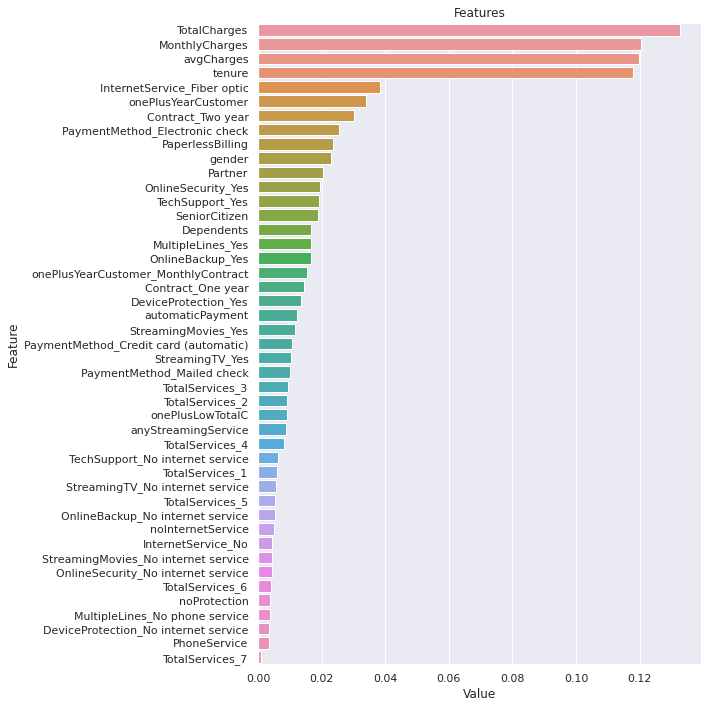

In [74]:
plot_importance(rf_model, x_train)